In [1]:
import contextily as ctx
from asp_plot.bundle_adjust import ReadResiduals, PlotResiduals

In [2]:
directory = "/Users/ben/Dropbox/UW_Shean/WV/2022/WV02_20220419_10300100D0772D00_10300100D12D7400/"

bundle_adjust_prefix = "ba/ba_50ips_10matches_dg_weight_image"

map_crs = "EPSG:32604"

In [3]:
residuals = ReadResiduals(directory, bundle_adjust_prefix)
resid_init_gdf, resid_final_gdf = residuals.get_init_final_residuals_gdfs()
resid_mapprojected_gdf = residuals.get_mapproj_residuals_gdf()
resid_triangulation_uncert_df = residuals.get_propagated_triangulation_uncert_df()

In [4]:
resid_triangulation_uncert_df

,left_image,right_image,horiz_error_median,vert_error_median,horiz_error_mean,vert_error_mean,horiz_error_stddev,vert_error_stddev,num_meas
0,10300100D12D7400.r100.tif,10300100D0772D00.r100.tif,5.347845,10.651996,5.351888,10.653534,0.021195,0.016561,2248


In [5]:
ctx_kwargs = {
    "crs": map_crs,
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}

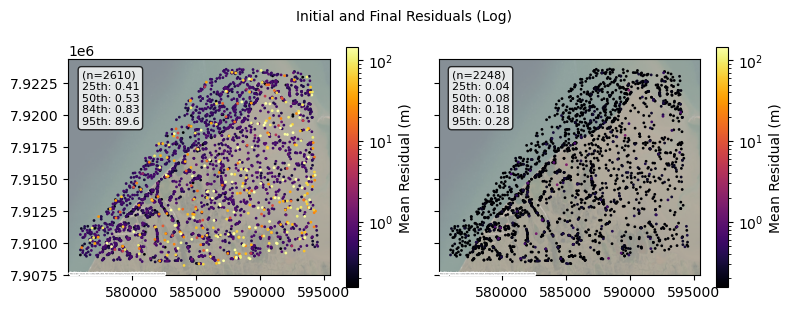

In [6]:
plotter = PlotResiduals(
  [resid_init_gdf, resid_final_gdf],
  lognorm=True,
  cbar_label="Mean Residual (m)",
  title="Initial and Final Residuals (Log)"
)

plotter.plot_n_residuals(
    column_name="mean_residual",
    map_crs=map_crs,
    **ctx_kwargs
)

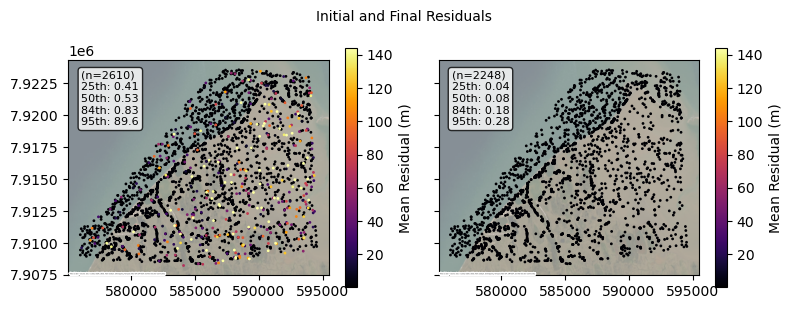

In [7]:
plotter = PlotResiduals(
  [resid_init_gdf, resid_final_gdf],
  cbar_label="Mean Residual (m)",
  title="Initial and Final Residuals"
)

plotter.plot_n_residuals(
    column_name="mean_residual",
    map_crs=map_crs,
    **ctx_kwargs
)

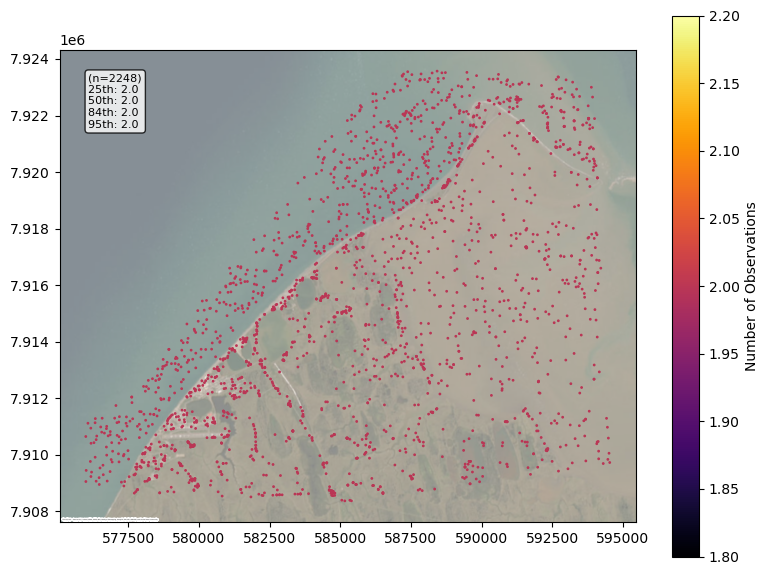

In [8]:
plotter = PlotResiduals(
  [resid_final_gdf],
  cbar_label="Number of Observations"
)

plotter.plot_n_residuals(
    column_name="num_observations",
    map_crs=map_crs,
    **ctx_kwargs
)

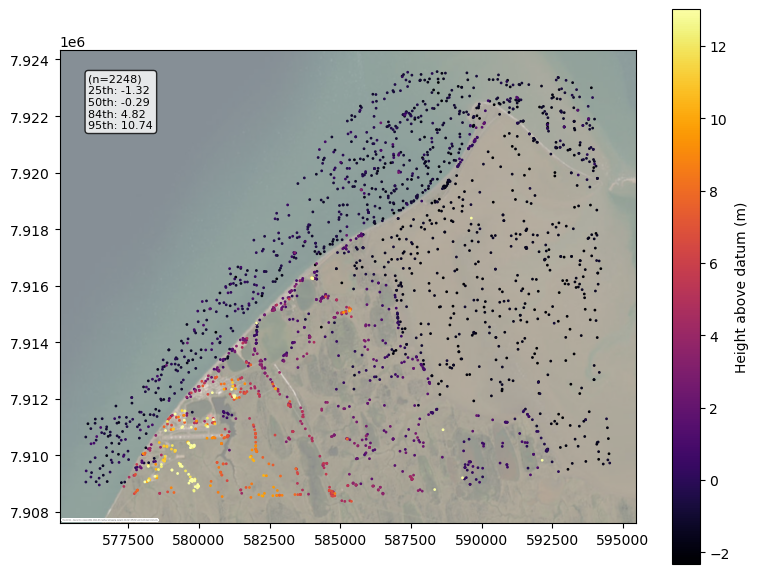

In [9]:
plotter = PlotResiduals(
  [resid_final_gdf],
  cbar_label="Height above datum (m)"
)

plotter.plot_n_residuals(
    column_name="height_above_datum",
    map_crs=map_crs,
    **ctx_kwargs
)

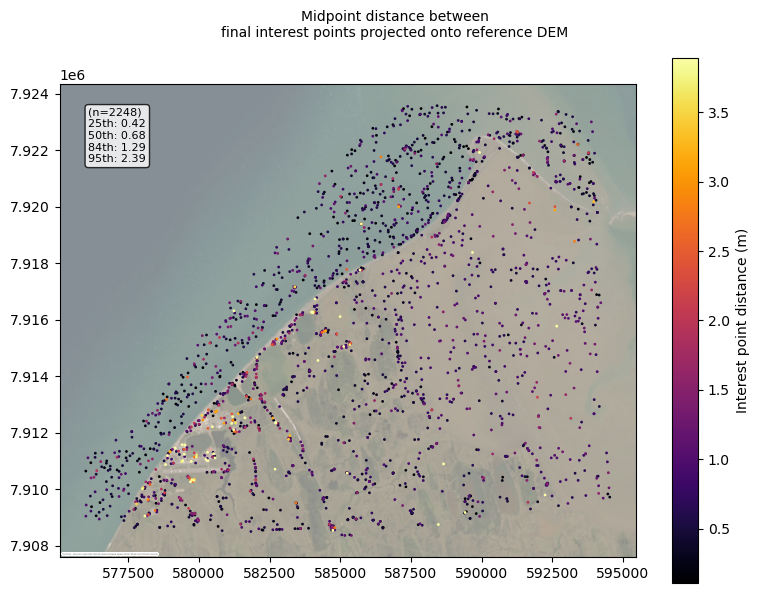

In [10]:
plotter = PlotResiduals(
  [resid_mapprojected_gdf],
  title="Midpoint distance between\nfinal interest points projected onto reference DEM",
  cbar_label="Interest point distance (m)"
)

plotter.plot_n_residuals(
    column_name="mapproj_ip_dist_meters",
    map_crs=map_crs,
    **ctx_kwargs
)